# Chapter 10 - Scientific and Engineering Libraries

In this chapter, we will cover several libraries that are very functional in scientific computing problems. However, note that the coverage in this chapter is in no way intended to be comprehensive.



## 10.1 Numerical Computing with NumPy

NumPy can be considered as a library for working with vectors and matrices. NumPy calls vectors and matrices as *arrays*. 

<table bgcolor="pink" width="75%" align=center >
  <tr></tr>
  <tr><td> <font size=3.5> <b> Installation Notes</b>
  
  To be able to use the NumPy library, you will need to download it 
  from <a href="http://www.numpy.org">numpy.org</a> and <br> install it on your computer. If you are using a Python package manager
  (e.g. pip), <br> you can install it directly using: `$ pip install numpy`. Note that if you are using Colab or <br>another Jupyter Notebook viewer, the platform may already have numpy installed.
  </font> </td></tr>
 </table> <br>



### 10.1.1 Arrays and Their Basic Properties

Let us consider a simple vector and a matrix:
$$
array1 = \begin{pmatrix}
1 & 2 & 3 \\
\end{pmatrix}
$$
and
$$
array2 = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 
\end{pmatrix}
$$

Let us see how we can represent and work with these two arrays in NumPy:

```python
>>> import numpy as np          # Import the NumPy library
>>> array1 = np.array([1, 2, 3])
>>> array2 = np.array([[1, 2, 3], [4, 5, 6]])
>>> type(array1)
<class 'numpy.ndarray'>
>>> type(array2)
<class 'numpy.ndarray'>
>>> array1
array([1, 2, 3])
>>> array2
array([[1, 2, 3],
       [4, 5, 6]])
>>> print(array2)
[[1 2 3]
 [4 5 6]]
```

We see from this example that we can pass lists of number as arguments to `np.array` function which creates a NumPy array for us. If the argument is a nested list, each element of the list is used as a row of a 2D array. 

Arrays can contain any data type as elements; however, we will limit ourselves to numbers (integers and real numbers) in this chapter.

**Shapes, Dimensions and Number of Elements of Arrays**. The first thing we can do with a NumPy array is check its shape. For our example `array1` and `array2`, we can do so as follows:

```python
>>> array1.shape
(3,)
>>> array2.shape
(2,3)
```

where we can see that `array1` is a one-dimensional array with $3$ elements and `array2` is a $2\times 3$ array (a 2D matrix). 

For a 2D array, a shape value `(R, C)` denotes the number of rows first (`R`), which is sometimes also called the first dimension, and then the number of columns (`C`), which is the second dimension. For $n$D arrays with $n>2$, the meaning of the shape values is the same except that there are $n$ values in the shape.

In NumPy, we can easily change the shape of an array without losing content:

```python
>>> array1.reshape((3,1))
array([[1],
       [2],
       [3]])
>>> array2.reshape((1,6))
array([[1, 2, 3, 4, 5, 6]])
``` 

For many applications, we will need to access the number of dimensions of an array. For this purpose, we can use `.ndim` value:

```python
>>> array1.ndim
1
>>> array2.ndim
2
```

The number of elements in an array is another important value that we are frequently interested in. To access that, we can use the `.size` value:

```python
>>> array1.size
3
>>> array2.size
6
```

**Accessing elements in arrays**. NumPy allows the same indexing mechanisms that you can use with Python's native container data types. For NumPy, let us look at some examples:

```python
>>> array1[-1]
3
>>> array2[1][2]
6
>>> array2[-1]
array([4, 5, 6])
```

**Creating arrays**. We have already seen that we can create arrays using the `np.array()` function. However, there are other ways for creating arrays conforming to predefined specifications. We can for example create arrays filled with zeros or ones (note that the argument is a tuple describing the shape of the matrix):

```python
>>> np.zeros((3, 4))
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])
>>> np.ones((2,6))
array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])
```
Alternatively, we can create an array filled with a range of values using `np.arange()` function:

```python
>>> np.arange(1,10)     # 1: starting value. 10: ending value (excluded)
array([1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> np.arange(1,10,2)
array([1, 3, 5, 7, 9])
>>> np.arange(1,10).reshape((3,3))
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
```

### 10.1.2 Working with Arrays

The previous section covered how we can access elements in an array and properties of an array. Now let us see how the different types of operations we can do with arrays.

**Arithmetic, Relational and Membership Operations with Arrays**

The arithmetic operations (`+`, `-`, `*`, `/`, `**`), the relational operations (`==`, `<`, `<=`, `>`, `>=`) and the membership operations (`in`, `not in`)   that we can apply on numbers and other data types in Python can be applied on arrays with NumPy. These operations are performed elementwise. This means that the arrays that are provided as operands to a binary arithmetic operator need to have the same shape.

Let us see some examples for arithmetic operations:

```python
>>> A = np.arange(4).reshape((2,2))
>>> A
array([[0, 1],
       [2, 3]])
>>> B = np.arange(4, 8).reshape((2,2))
>>> B
array([[4, 5],
       [6, 7]])
>>> print(B-A)
[[4 4]
 [4 4]]
>>> print(B+A)
[[ 4  6]
 [ 8 10]]
>>> A
array([[0, 1],
       [2, 3]])
>>> B
array([[4, 5],
       [6, 7]])
```

Note here that these operations create a new array whose elements are the results of applying the operation. Therefore, the original arrays are not modified. If are interested in-place operations that modify an existing array during the operation, you can use combined statements such as `+=`, `-=`, `*=`.

Relational and membership operations are also applied elementwise and we can easily anticipate the outcomes of such operations, e.g. as follows:

```python
>>> A < B
array([[ True,  True],
       [ True,  True]])
>>> B > A
array([[ True,  True],
       [ True,  True]])
>>> A > B
array([[False, False],
       [False, False]])
>>> 4 in B
True
>>> 10 in B
False
```

**Useful Functions**

NumPy arrays provide several useful functions already provided. These include:
- Standard mathematical function such as exponent, sin, cos, square-root: `np.exp(<array>)`, `np.sin(<array>)`, `np.cos(<array>)`, `np.sqrt(<array>)`. 
- Minimum and maximum: `<array object>.min()` and `<array object>.max()`.
- Summation, mean and standard deviation:  `<array object>.sum()`, `<array object>.mean()` and `<array object>.std()`.

Note that minimum, maximum, summation, mean and standard deviation can be applied on the whole array as well as along a pre-specified dimension (specified with an `axis` parameter). Let us see some examples to clarify this important aspect:

```python
>>> A
array([[0, 1],
       [2, 3]])
>>> A.sum()
6
>>> A.sum(axis=0)
array([2, 4])
>>> A.sum(axis=1)
array([1, 5])
>>> A.sum(axis=2)
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py", line 47, in _sum
    return umr_sum(a, axis, dtype, out, keepdims, initial, where)
numpy.AxisError: axis 2 is out of bounds for array of dimension 2
```

where we see that axes start being numbered from zero.

**Splitting and Combining Arrays**

For many problems, we will need to split an array into multiple arrays or combine multiple arrays into one. For splitting arrays, we can use functions such as `np.hsplit` (for horizontal split), `np.vsplit` (for vertical split) and `np.array_split` (for more general split operations). Below is an example for `hsplit` and `vsplit`:

```python
>>> L = np.arange(16).reshape(4,4)
>>> L
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
>>> np.hsplit(L,2)  # Divide L into 2 arrays along the horizontal axis
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]
>>> np.vsplit(L,2)
[array([[0, 1, 2, 3],
       [4, 5, 6, 7]]), array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])]
```

Note that the resultant arrays are provided as a Python `list`. Note also that `hsplit` and `vsplit` functions work on even sizes (i.e. they can split into equally sized arrays) -- for general split operations, you can use `array_split`.

For combining multiple arrays, we can use `np.hstack` (for horizontal stacking), `np.vstack` (for vertical stacking) and `np.stack` (for more general stacking operations). Below is an example (for the `A` and `B` arrays that we have created before):

```python
>>> A
array([[0, 1],
       [2, 3]])
>>> B
array([[4, 5],
       [6, 7]])
>>> np.hstack((A, B))
array([[0, 1, 4, 5],
       [2, 3, 6, 7]])
>>> np.vstack((A, B))
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])
```

**Iterations with Arrays**.

NumPy library already provides for us many functionalities that we might need while working with arrays. However, in many circumstances those will not be necessary and we will need to be able to iterate over the elements of arrays and perform custom algorithmic steps. 

Luckily, iteration with arrays is very similar to how we would perform iterations with other container data types in Python. Let us see some examples:

```python
>>> L
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
>>> for r in L:
...     print("row: ", r)
... 
row:  [0 1 2 3]
row:  [4 5 6 7]
row:  [ 8  9 10 11]
row:  [12 13 14 15]
```

where we see that iteration over a multi-dimensional array iterates over the first dimension. To iterate over each element, we have at least two options:

```python
>>> for element in L.flat:
...     print(element)
... 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
>>> for r in L:
...     for element in r:
...             print(element)
... 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
```

Now let us implement one of the operations we have seen above in Python from scratch as an exercise:



In [ ]:
import numpy as np

def horizontal_stack(A,B):
  """A function that combines two 2D arrays A and B. 
     A and B need to have the same height.
  """
  # Let us get dimensions first and check whether A and B 
  # are compatible for stacking.
  (H_A, W_A) = A.shape
  (H_B, W_B) = B.shape
  if H_A != H_B: 
    print("Arguments A and B have incompatible heights!")
    return None
  # Let us create an empty `result` array:
  H_result = H_A #or H_B
  W_result = W_A + W_B
  result = np.zeros((H_result, W_result))

  # Now let us iterate over each position in A and B and place
  # their elements into the corresponding positions
  for i in range(H_A):
    for j in range(W_A):
      result[i][j] = A[i][j]
    for j in range(W_B):
      result[i][j+W_A] = B[i][j]

  return result

# Let us test our code:
M = np.random.randn(2,2) # Create a random 3x4 array
N = np.random.randn(2,3) # Create a random 3x6 array
print("Random array M is:\n", M)
print("Random array N is:\n", N)
print("Horizontal stacking of M and N yields:\n", horizontal_stack(M, N))

Random array M is:
 [[-0.55478637  0.07132481]
 [-0.42421305 -1.27581716]]
Random array N is:
 [[-0.82105253  0.81587345  0.387333  ]
 [ 0.65646521 -0.13921063  0.6857726 ]]
Horizontal stacking of M and N yields:
 [[-0.55478637  0.07132481 -0.82105253  0.81587345  0.387333  ]
 [-0.42421305 -1.27581716  0.65646521 -0.13921063  0.6857726 ]]


## Exercise 1

Define functions that work like the `sum`, `mean`, `min` and `max` operations provided by NumPy. These functions should take a single 2D array and return the result as a number. You can assume that the operation applies to the whole array and not to a single axis.

In [ ]:
# Write your solution for Exercise 1 here

def my_array_sum(A):
  # Your solution comes here

def my_array_mean(A):
  # Your solution comes here

def my_array_min(A):
  # Your solution comes here

def my_array_max(A):
  # Your solution comes here

# Write code here that tests the functions you have defined


### 10.1.3 Linear Algebra with NumPy

Now let us give a flavour of the Linear Algebra operations provided by NumPy. Note that some of these operations is provided in the module `numpy.linalg`.



**Transpose**.

The transpose operation flips a matrix along the diagonal. For an example matrix $A$,

$$
A = \begin{pmatrix}
1 & 2  \\
3 & 4  
\end{pmatrix}
$$
its transpose is the following:
$$
A^T = \begin{pmatrix}
1 & 3 \\
2 & 4  \\
\end{pmatrix}
$$

In NumPy, the transpose of a matrix can be easily accessed by accessing its `.T` member variable or by calling its `.transpose()` member function:

```python
>>> A
array([[1, 2],
       [3, 4]])
>>> A.T
array([[1, 3],
       [2, 4]])
>>> A
array([[1, 2],
       [3, 4]])
```

Note that `.T` is simply a member variable of the array object and is not defined as an operation. Try finding the transpose of `A` with `A.transpose()` and see that you obtain the expected result. Note also that the transpose operation does not change the original array.

**Inverse**.

The inverse of an $n\times n$ matrix $A$ is an $n\times n$ matrix $A^{-1}$ that yields an $n\times n$ identity matrix $I$ when multiplied:
$$
A \times A^{-1} = I.
$$

In NumPy, we can use `np.linalg.inv(<array>)` to find the inverse of a square array. Here is an example:

```python
>>> A
array([[1, 2],
       [3, 4]])
>>> A_inv = np.linalg.inv(A)
>>> A_inv
array([[-2. ,  1. ],
       [ 1.5, -0.5]])
```

Let us check whether the inverse was correctly calculated:

```python
>>> np.matmul(A, A_inv)
array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])
```

which is the identity matrix ($I$) except for some rounding error at index $(1,0)$ owing to floating point approximation. However, as we have seen in Chapter 2, while writing our programs, we should compare numbers such that `8.8817842e-16` can be considered to be equal to zero.

**Determinant, norm, rank, condition number, trace**

While working with matrices, we often require the following properties which can be easily calculated. For the sake of brevity and to keep the focus, we will omit their explanations:

| Matrix Property | How to Calculate with NumPy |
|:-----:|:-----:|
| Determinant ($|A|$ or $det(A)$) | `np.linalg.det(A)`  |
| Norm ($||A||$) | `np.linalg.norm(A)` |
| Rank ($rank(A)$) | `np.linalg.matrix_rank(A)` |
| Condition number ($\kappa(A)$) | `np.linalg.cond(A)` |
| Trace ($tr(A)$) | `np.linalg.trace(A)` | 

**Dot Product, Inner Product, Outer Product, Matrix Multiplication**

The product of two matrices can be calculated in different ways:

- `np.dot(a, b)`: For vectors (1D arrays), this is equivalent to the dot product (i.e. $\sum_i \mathbf{a}_i \times \mathbf{b}_i$ for two vectors $\mathbf{a}$ and $\mathbf{b}$). For 2D arrays and arrays with more dimensions, the result is matrix multiplication.

- `np.inner(a,b)`: For vectors, this is dot product (like `np.dot(a,b)`). For higher-dimensional arrays, the result is a sum product over the last axes. Consider the following example for clarification on this:

```python
>>> A
array([[0, 1],
       [2, 3]])
>>> B
array([[4, 5],
       [6, 7]])
>>> np.inner(A,B)
array([[ 5,  7],
       [23, 33]])
```

The last axes for both `A` and `B` are the horizontal axes. Therefore, each first-axis element of `A` (i.e. [0, 1] and [2,3]) is multiplied with each first-axis element of `B` ([4, 5] and [6, 7]).

- `np.outer(a,b)`: Outer product is defined on vectors such that `result[i,j] = a[i] * b[j]`.

- `np.matmul(a,b)`: Matrix multiplication of matrices `a` and `b`. The result is simply calculated as $\textrm{result}_{ij} = \sum_k \mathbf{a}_{ik} \mathbf{b}_{kj}$, as also illustrated in Figure 10.1.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/2560px-Matrix_multiplication_diagram_2.svg.png" width="50%" align=center><br>

*Figure 10.1. Illustration of matrix multiplication of two matrices A and B. (Figure source: <a href="https://en.wikipedia.org/wiki/Matrix_multiplication">Wikipedia</a>)*
</center>

**Eigenvectors and Eigenvalues**

Explaining eigenvectors and eigenvalues is beyond the scope of the book. However, we can briefly remind that eigenvectors and eigenvalues are the variables that satisfy the following for a matrix $A$ which can be considered as a transformation in a vector space:
$$
Av = \lambda v.
$$
In other words, $v$ is such a vector that $A$ just changes its scale by a factor $\lambda$.

In NumPy, eigenvectors and eigenvalues can be obtained by `np.linalg.eigh(<array>)` which returns a tuple with the following two elements:

1. Eigenvalues (an array of $\lambda$) in decreasing order.
2. Eigenvectors ($v$) as a column matrix. I.e. `v[:, i]` is the eigenvector corresponding to the eigenvalue $\lambda[i]$. 

**Matrix Decompositions**

Numpy also provides many frequently used matrix decompositions, as listed below:

| Matrix Decomposition | How to Calculate with NumPy |
|:-----:|:-----:|
| Cholesky decomposition | `linalg.cholesky(A)`  |
| QR factorization | `np.linalg.qr(A)` |
| Singular Value Decomposition | `linalg.svd(a)` |

**Solve a linear system of equations**

Given a linear system of equations as follows:

$$
  a_{11} x_1 + a_{12} x_2 + ... + a_{1n} x_n = b_1,\\
  a_{21} x_1 + a_{22} x_2 + ... + a_{2n} x_n = b_2,\\
  ... \\
  a_{n1} x_1 + a_{22} x_2 + ... + a_{nn} x_n = b_n,\\
$$

which can be represented in compact form as:

$$
\mathbf{a} \mathbf{x} = \mathbf{b},
$$

can be solved in NumPy using `np.linalg.solve(a, b)`.

Below is an easy example:

```python
>>> A
array([[0, 1],
       [2, 3]])
>>> B
array([3, 4])
>>> np.linalg.solve(A,B)
array([-2.5,  3. ])
>>> X = np.linalg.solve(A,B)
>>> X
array([-2.5,  3. ])
```

which can be easily verified using multiplication:

```python
>>> np.inner(A, X)
array([3., 4.])
```

which is equal to `B`.

### 10.1.4 Efficiency Concerns: Why Use NumPy?

The previous sections have illustrated how capable the NumPy library is and how easily we can do many calculations with the pre-defined functionalities e.g. in its linear algebra module. Since we can access each element of an array using Python's indexing mechanisms, we can be tempted to implementing those functionalities ourselves, from scratch.

However, those functionalities in NumPy are *not* implemented in Python but in C, another high-level programing language where programs are directly compiled into machine executable binary code. Therefore, they would execute much faster in comparison to what we would be implementing in Python. 

The following example illustrates this. When executed, you should see an order of $~$1000 difference in running time. 

In other words, you are strongly advised, whenever possible, to use NumPy's existing functions and routines, and to write every operation in vector or matrix form as much as possible if you are working with matrices.

In [ ]:
import numpy as np
from time import time

def matmul_2D(M, N):
  """Custom defined matrix multiplication for two 2D matrices M and N"""
  (H_M, W_M) = M.shape
  (H_N, W_N) = N.shape
  if W_M != H_N: 
    print("Dimensions of M and N mismatch!")
    return None

  result = np.zeros((H_M, W_N))
  for i in range(H_M):
    for j in range(W_N):
      for k in range(W_M):
        result[i][j] += M[i][k] * N[k][j]
  
  return result

# First let us check that our code works as expected
M = np.random.randn(2,3)
N = np.random.randn(3,4)

print("Our matmul_2D result: \n", matmul_2D(M, N))
print("Correct result: \n", np.matmul(M, N))

# Now let us measure the running-time performances
# Create two 2D large matrices
M = np.random.randn(100, 100)
N = np.random.randn(100, 100)

# Option 1: Use NumPy's matrix multiplication
t1 = time()
result = np.matmul(M, N)
t2 = time()
print("NumPy's matmul took ", t2-t1, "ms.")

# Option 2: Use our matmul_2D function
t1 = time()
result = matmul_2D(M, N)
t2 = time()
print("Our matmul_2D function took ", t2-t1, "ms.")

Our matmul_2D result: 
 [[1.44819064 2.44425364 3.19640633 0.98131108]
 [1.91135161 2.66745824 4.09341735 1.37928184]]
Correct result: 
 [[1.44819064 2.44425364 3.19640633 0.98131108]
 [1.91135161 2.66745824 4.09341735 1.37928184]]
NumPy's matmul took  0.008047342300415039 ms.
Our matmul_2D function took  1.2613885402679443 ms.


## 10.2 Scientific Computing with SciPy

SciPy is a library that includes many methods and facilities for Scientific Computing. It is closely linked with NumPy so much that NumPy needs to be imported first to be able to use SciPy. 

<table bgcolor="pink" width="75%" align=center >
  <tr></tr>
  <tr><td> <font size=3.5> <b> Installation Notes</b>
  
  To be able to use the SciPy library, you will need to download it 
  from <a href="http://www.scipy.org">scipy.org</a> and <br> install it on your computer. If you are using a Python package manager
  (e.g. pip), <br> you can install it directly using: `$ pip install scipy`. Note that if you are using Colab or <br>another Jupyter Notebook viewer, the platform may already have scipy installed.
  </font> </td></tr>
 </table> <br>

Below is a list of some modules provided by SciPy. Even a brief coverage of these modules is not feasible in a chapter. However, we will see an example in Chapter 12 using SciPy's `stats` and `optimize` modules.

| Module | Description |
|:-----:|:-----:|
cluster | Clustering algorithms
constants | Physical and mathematical constants
<font color=red>fftpack</font> | Fast Fourier Transform routines
<font color=red>integrate</font> | Integration and ordinary differential equation solvers
<font color=red>interpolate</font> | Interpolation and smoothing splines
io | Input and Output
<font color=red>linalg</font> | Linear algebra
ndimage | N-dimensional image processing
odr | Orthogonal distance regression
<font color=red>optimize</font> | Optimization and root-finding routines
<font color=red>signal</font> | Signal processing
sparse | Sparse matrices and associated routines
spatial | Spatial data structures and algorithms
special | Special functions
<font color=red>stats</font> | Statistical distributions and functions



## 10.3 Data handling & analysis with Pandas

Pandas is a very handy library for working with files with different formats and analyzing data in different format. To keep things simple, in this section we will just look at CSV files. Note that the facilities for other formats are very similar.

<table bgcolor="pink" width="75%" align=center >
  <tr></tr>
  <tr><td> <font size=3.5> <b> Installation Notes</b>
  
  To be able to use the Pandas library, you will need to download it 
  from <a href="https://pandas.pydata.org/">pandas.pydata.org</a> and <br> install it on your computer. If you are using a Python package manager
  (e.g. pip), <br> you can install it directly using: `$ pip install pandas`. Note that if you are using Colab or <br>another Jupyter Notebook viewer, the platform may already have pandas installed.
  </font> </td></tr>
 </table> <br>

### 10.3.1 Supported File Formats

As we have seen before, Python already provides facilities for reading and writing files. However, if you need to work with "structured" files such as CSV, XML, XLSX, JSON, HTML, the native facilities of Python would need to extended significantly. 

That's where Pandas comes in. It complements Python's native facilities to be able to work with structured files for both reading data from them and creating new files. Below is a list of the different file formats that Pandas supports and the corresponding functions for reading or writing them. 

<center>
 
*Table 10.1. The file formats supported by the Pandas library. The table is adapted from and the reader is encouraged to check the following page to see a more up-to-date list:* <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">Pandas IO Reference</a>.

</center>

| Format Type | Data Description | Reader | Writer| 
|:-----:|:-----:|:-----:|:-----:|
text | CSV | read_csv | to_csv | 
text | Fixed-Width Text File | read_fwf | - | 
text | JSON | read_json | to_json |
text | HTML | read_html | to_html |
text | Local clipboard | read_clipboard | to_clipboard |
  -    | MS Excel | read_excel | to_excel | 
binary | OpenDocument | read_excel |  - |
binary | HDF5 Format | read_hdf | to_hdf |
binary | Feather Format | read_feather | to_feather |
binary | Parquet Format | read_parquet | to_parquet |
binary | ORC Format | read_orc |  - |
binary | Msgpack | read_msgpack | to_msgpack |
binary | Stata | read_stata | to_stata |
binary | SAS | read_sas | - |
binary | SPSS | read_spss | - |
binary | Python Pickle Format | read_pickle | to_pickle |
SQL | SQL | read_sql |  to_sql |
SQL | Google BigQuery | read_gbq | to_gbq |

### 10.3.2 Data Frames

Pandas library is built on top of a data type called `DataFrame` which is used to store all types of data while working with Pandas. In the following, we will illustrate how you can get your data into a `DataFrame` object:

1. **Loading data from a file**.  If you have your data in a file that is supported by Pandas, you can use its reader for directly obtaining a `DataFrame` object. Let us look at an example CSV file:


In [ ]:
# Download an example CSV file:
!wget -nc https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch10_example.csv

# Import the necessary libraries
import pandas as pd

# Read the file named 'ch10_example.csv'
df = pd.read_csv('ch10_example.csv')

# Print the CSV file's contents:
print("The CSV file contains the following:\n", df, "\n")

# Check the types of each column
df.dtypes

--2020-09-22 10:50:26--  https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch10_example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162 [text/plain]
Saving to: ‘ch10_example.csv’

ch10_example.csv    100%[===================>]     162  --.-KB/s    in 0s      

2020-09-22 10:50:26 (9.94 MB/s) - ‘ch10_example.csv’ saved [162/162]

The CSV file contains the following:
       Name  Grade  Age
0     Jack   40.2   20
1   Amanda   30.0   25
2     Mary   60.2   19
3     John   85.0   30
4    Susan   70.0   28
5     Bill   58.0   28
6     Jill   90.0   27
7      Tom   90.0   24
8    Jerry   72.0   26
9   George   79.0   22
10  Elaine   82.0   23 



Name      object
Grade    float64
Age        int64
dtype: object

  Note the following critical details:  
  - `read_csv` file automatically understood that our CSV file had a header ("Name Surname", "Grade (over 100)" and "Age"). If your file does not have a header, you can call `read_csv` with the `header` parameter set to `None` as follows: `pd.read_csv(filename, header=None)`.

  - `read_csv` read all columns in the CSV file. If you wish to load only some of the columns (e.g. 'Name Surname', 'Age' in our example), you can relay this using the `names` parameter as follows: `pd.read_csv(filename, names=['Name Surname', 'Age'])`.

2. **Convert Python data into a `DataFrame`**. Alternatively, you can have already a Python data object which you can provide as argument to a `DataFrame` constructor as illustrated with the following example:

In [ ]:
lst = [('Jack', 40.2, 20), ('Amanda',	30, 25), ('Mary',	60.2, 19)]
df = pd.DataFrame(data = lst, columns=['Name', 'Grade', 'Age'])
print(df)

     Name  Grade  Age
0    Jack   40.2   20
1  Amanda   30.0   25
2    Mary   60.2   19


  In many cases, we will require the rows to be associated with names, or sometimes called as keys. For example, instead of referring to a row as "the row at index 1", we might require accessing a row with a non-integer value. This can be achieved as follows (note how the printed DataFrame looks different):

In [ ]:
names = ['Jack', 'Amanda', 'Mary']
lst = [(40.2, 20), (30, 25), (60.2, 19)]
df = pd.DataFrame(data = lst, index=names, columns=['Grade', 'Age'])
print(df)

        Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19


### 10.3.3 Accessing Data with DataFrames

We can access data columnwise or row-wise. 

**1. Columnwise access.**

For columnwise access, you can use `df['Name']`, which returns a sequence of values. To access a certain element in that sequence, you can either use an integer index (as in `df['Name'][1]`) or named index if it has been defined (as in `df['Name']['Amanda']`). The following example illustrates this for the example `DataFrame` we have created above:
```python
    >>> print(df)
            Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19
    >>> print(df['Grade'][1])
    30.0
    >>> print(df['Grade']['Amanda'])
    30.0
```

**2. Rowwise access.**

To access a particular row, you can either use integer indexes with `df.iloc[<row index>]` or `df.loc[<row name>]` if a named index is defined. This is illustrated below:

```python
  >>> print(df)
            Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19
  >>> print(df.iloc[1])
  Grade    30.0
  Age      25.0
  Name: Amanda, dtype: float64
  >>> print(df.loc['Amanda'])
  Grade    30.0
  Age      25.0
  Name: Amanda, dtype: float64
``` 
  You can also provide both column index and name index in a single operation, i.e. `[<row index>, <column index>]` or `[<row name>, <column name>]` as illustrated below: 

  ```python
  >>> df.loc['Amanda','Grade']
  30.0
  >>> df.iloc[1, 1]
  25
  ```
  While accessing a `DataFrame` with integer indexes, you can also use Python's slicing; i.e. `[start:end:step]` indexing.

### 10.3.4 Modifying Data with DataFrames

Although modifying data in a `DataFrame` is simple, you need to be careful about one crucial concept: Let us say you use column and row names to change the contents of a cell and you access first the column and then the corresponding row as follows:

```python
>>> print(df)
            Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19
>>> df['Grade']['Amanda'] = 45
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
```
  
This is called *chained indexing* and Pandas will give you a warning that you are modifying a `DataFrame` that was *returned* while accessing columns or rows in your original `DataFrame`: `df['Grade']` returns a direct access for the original  `Grade` column or a copy to it and depending on how your data is structured and stored in the memory, the end result may be different and your change might not be reflected on the original `DataFrame`. 

Instead, you should use a single access operation as illustrated below (you may do this with `loc` and `iloc` as well):

```python
>>> print(df)
        Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19
>>> df['Amanda','Grade'] = 45
>>> df[1,1] = 30
>>> print(df)
        Grade  Age
Jack     40.2   20
Amanda   45.0   30
Mary     60.2   19
```

With these facilities, you can now access every item in a `DataFrame` and modify them. 

### 10.3.5 Analyzing Data with DataFrames 

Once we have our data in a `DataFrame`, we can use Pandas's built-in facilities for analyzing our data. One very simple way to analyze data is via descriptive statistics, which you can access with `df.describe()` and `df[<column>].value_counts()`:


In [ ]:
print(df)
df.describe()

In [ ]:
df['Age'].value_counts()

19    1
25    1
20    1
Name: Age, dtype: int64

Apart from these descriptive functions, Pandas provides functions for sorting (using `.sort_values()` function), finding the maximum or the minimum (using `.max()` or `.min()` functions) or finding the largest or smallest n values (using `.nsmallest()` or `.nlargest()` functions: 

In [ ]:
print("Maximum grade is: ", df['Grade'].max())
print("Records sorted according to age:\n", df['Age'].sort_values())
print("Top two grades are:\n", df['Grade'].nlargest(2))

Maximum grade is:  60.2
Records sorted according to age:
 Mary      19
Jack      20
Amanda    25
Name: Age, dtype: int64
Top two grades are:
 Mary    60.2
Jack    40.2
Name: Grade, dtype: float64


Note that, the displayed output includes the names because we selected names as the indices for accessing the rows. 

### 10.3.6 Presenting Data in DataFrames

Pandas provides a very easy mechanism for plotting your data via `.plot()` function. Examples are provided below to illustrate how you can plot your own data. This plotting facility is provided by the Matplotlib which we will see next.

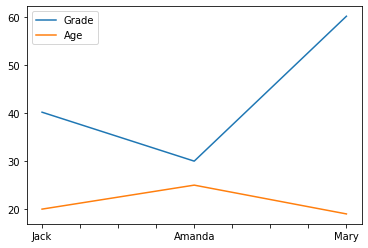

In [ ]:
#Plots all columns in different colours
df.plot()

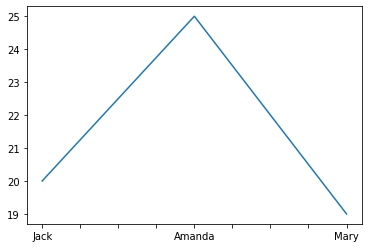

In [ ]:
# Plots a single column
df['Age'].plot()

## 10.4 Plotting data with Matplotlib

Matplotlib is a very capable library for drawing different types of plots in Python. It is very well integrated with Numpy, Scipy and Pandas, and therefore, all these libraries are very frequently used together seamlessly. 

<table bgcolor="pink" width="75%" align=center >
  <tr></tr>
  <tr><td> <font size=3.5> <b> Installation Notes</b>
  
  To be able to use the matplotlib library, you will need to download it 
  from <a href="https://matplotlib.org/">https://matplotlib.org/</a> and <br> install it on your computer. If you are using a Python package manager
  (e.g. pip), <br> you can install it directly using: `$ pip install matplotlib`. Note that if you are using Colab or <br>another Jupyter Notebook viewer, the platform may already have pandas installed.
  </font> </td></tr>
 </table> <br>

### 10.4.1 Parts of a Figure
A figure consists of the following elements (see also Figure 10.4.1):
- Title of the figure.
- Axes, together with their ticks, tick labels, and axis labels.
- The canvas of plot, which consists of a drawing of your data in the form of a dots (scatter plot), lines (line plot), bars (bar plot), surfaces etc.
- Legend, which informs the perceiver about the different plots in the canvas. 

<center>
<img src="https://matplotlib.org/_images/anatomy.png">

*Figure 10.4.1. A figure consists of several components all of which you can change in matplotlib easily. Figure source: <a href="https://matplotlib.org/tutorials/introductory/usage.html">Matplotlib Usage Guides</a>.*
</center>


### 10.4.2 Preparing your Data for Plotting

Matplotlib expects numpy arrays as input and therefore, if you have your data in a numpy array, you can directly plot it without any data type conversion. With pandas `DataFrame`, the behavior is not guaranteed and therefore, it is recommended that the values in a `DataFrame` are first converted to a numpy array, using e.g.:


In [ ]:
print(df)
age_array = df['Age'].values
print("The `Age` values in an array form are:", age_array)
print("The type of our new data is: ", type(age_array))

        Grade  Age
Jack     40.2   20
Amanda   30.0   25
Mary     60.2   19
The `Age` values in an array form are: [20 25 19]
The type of our new data is:  <class 'numpy.ndarray'>



### 10.4.3 Drawing Single Plots

There are two ways to plot with matplotlib: In an object-oriented style or the so-called Pyplot style:

**1. Drawing in an Object-Oriented Style**.
In this style, we create a figure object and an axes object and work with those to create our plots. This is illustrated in the following example:

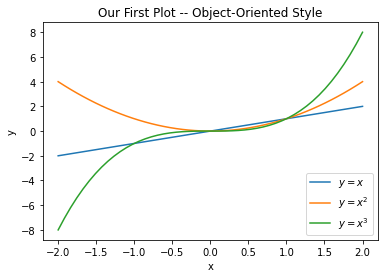

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Uniformly sample 50 x values between -2 and 2:
x = np.linspace(-2, 2, 50)

# Create an empty figure
fig, ax = plt.subplots()

# Plot y = x
ax.plot(x, x, label='$y=x$') 

# Plot y = x^2
ax.plot(x, x**2, label='$y=x^2$')

# Plot y = x^3
ax.plot(x, x**3, label='$y=x^3$')

# Set the labels for x and y axes:
ax.set_xlabel('x') 
ax.set_ylabel('y')

# Set the title of the figure
ax.set_title("Our First Plot -- Object-Oriented Style")

# Create a legend
ax.legend()

**2. Drawing in a Pyplot Style**. In the Pyplot style, we directly call functions in the pyplot module (`matplotlib.pyplot`) to create a figure and draw our plots. This style does not work with an explicit figure or axes objects. This is illustrated in the following example:



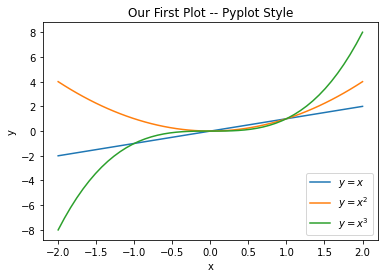

In [ ]:
# Uniformly sample 50 x values between -2 and 2:
x = np.linspace(-2, 2, 50)

# Plot y = x
plt.plot(x, x, label='$y=x$') 

# Plot y = x^2
plt.plot(x, x**2, label='$y=x^2$')

# Plot y = x^3
plt.plot(x, x**3, label='$y=x^3$')

# Set the labels for x and y axes:
plt.xlabel('x') 
plt.ylabel('y')

# Set the title of the figure
plt.title("Our First Plot -- Pyplot Style")

# Create a legend
plt.legend()

### 10.4.4 Drawing Multiple Plots in a Figure

In many situations, you will need to draw multiple plots side by side in a single figure. This can be performed in the object-oriented style using the `subplots()` function to create a grid and then use the created subplots and axes to draw the plots. This is illustrated with an example below:

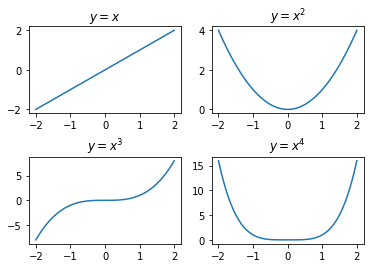

In [ ]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2)

# Plot (1,1)
axes[0,0].plot(x, x) 
axes[0,0].set_title("$y=x$")

# Plot (1,2)
axes[0,1].plot(x, x**2) 
axes[0,1].set_title("$y=x^2$")

# Plot (2,1)
axes[1,0].plot(x, x**3) 
axes[1,0].set_title("$y=x^3$")

# Plot (2,2)
axes[1,1].plot(x, x**4) 
axes[1,1].set_title("$y=x^4$")

# Adjust vertical space between rows
plt.subplots_adjust(hspace=0.5)

### 10.4.4 Changing elements of a plot

All elements that are visualized in Figure 10.4.1 can be changed in matplotlib. We will skip these details to keep our focus in the book to the practical uses of these libraries. The interested reader can look up the extensive documentation at <a href="https://matplotlib.org/2.1.1/contents.html">https://matplotlib.org/2.1.1/contents.html</a> or look at the help page of a function (e.g. `help(plt.plot)`) to see how to modify all elements of a figure.

## Important Concepts

We would like our readers to have grasped the following crucial concepts and keywords from this chapter:

* NumPy arrays and their properties: array shape, dimensions, sizes, elements.
* Accessing and modifying elements of a NumPy array.
* Simple algebraic functions on NumPy arrays.
* SciPy and its basic capabilities.
* Pandas, DataFrame, loading files with Pandas.
* Accessing and modifying content in DataFrames.
* Analyzing and presenting data in DataFrames.
* Matplotlib and different ways to make plots.
* Drawing single and multiple plots. Changing elements of a plot.

## Further Reading

- NumPy documentation: https://numpy.org/doc/
- SciPy documenation: https://docs.scipy.org/doc/scipy/reference/
- Pandas documentation: https://pandas.pydata.org/docs/
- Matplotlib documentation: https://matplotlib.org/2.1.1/contents.html

## Exercises

- Define functions that work like the `sum`, `mean`, `min` and `max` operations provided by NumPy. These functions should take a single 2D array and return the result as a number. You can assume that the operation applies to the whole array and not to a single axis.

In [ ]:
# Write your solution for Exercise 1 here

def my_array_sum(A):
  # Your solution comes here

def my_array_mean(A):
  # Your solution comes here

def my_array_min(A):
  # Your solution comes here

def my_array_max(A):
  # Your solution comes here

# Write code here that tests the functions you have defined


- Create a simple CSV file using your favorite spreadsheet editor (e.g. Microsoft Excel or Google Spreadsheets) and create a file with your exams and their grades as two separate columns. Save the file, upload it to the Colab notebook and do the following:

  * Load the file using Pandas.
  * Calculate the mean of your exam grades.
  * Calculate the standard deviation of your grades.

- Using Matplotlib, generate the following plots with suitable names for the axes and the titles.

  * Draw the following four functions in separate single plots: $\sin(x), \cos(x), \tan(x), \cot(x)$. 

  * Draw these four functions in a single plot.

  * Draw a multiple 2x2 plot where each subplot is one of the four functions.